In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.precision", 2)
pd.set_option("display.float_format", lambda x: "%.2f" % x)

In [3]:
database_url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(database_url)

In [4]:
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [5]:
dados[["moeda","Valor_anuncio", "tipo"]] = dados["Valor"].str.split(expand = True)
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,moeda,Valor_anuncio,tipo
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


In [6]:
del dados["moeda"]

In [7]:
dados[dados["tipo"].isnull()]["tipo"].unique()

array([None], dtype=object)

In [8]:
dados_de_anuncios_filtrados = dados[dados["tipo"].isnull()]
dados_de_anuncios_filtrados

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_anuncio,tipo
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,540.000,None
...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,1.500.000,None
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,665.000,None
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,2.300.000,None
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,1.050.000,None


In [9]:
del dados_de_anuncios_filtrados["Valor"]

In [10]:
del dados_de_anuncios_filtrados["tipo"]

In [11]:
novo_nome_col = "Valor " + "(R$)"
dados_de_anuncios_filtrados = dados_de_anuncios_filtrados.rename(columns = {"Valor_anuncio": novo_nome_col})

In [12]:
dados_de_anuncios_filtrados["Valor (R$)"] = dados_de_anuncios_filtrados["Valor (R$)"].str.replace(".", "").astype(float)

C:\Users\josev\AppData\Local\Temp\ipykernel_20760\477650020.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados_de_anuncios_filtrados["Valor (R$)"] = dados_de_anuncios_filtrados["Valor (R$)"].str.replace(".", "").astype(float)


In [13]:
dados_de_anuncios_filtrados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor (R$)
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000.00
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00


In [14]:
dados_de_anuncios_filtrados["Valor_m2"] = dados_de_anuncios_filtrados["Valor (R$)"]/dados_de_anuncios_filtrados["Metragem"]
dados_de_anuncios_filtrados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor (R$),Valor_m2
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,7459.68
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,3040.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000.00,2209.68
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00,5400.00


In [15]:
dados_de_anuncios_filtrados.groupby("Bairro").mean()

,Metragem,Quartos,Banheiros,Vagas,Valor (R$),Valor_m2
Bairro,,,,,,
Aclimação,246.16,3.27,3.04,2.91,1763200.01,7656.17
Alto da Boa Vista,418.88,4.12,5.12,4.62,2391250.00,5849.57
Alto da Lapa,299.25,3.15,3.85,4.00,2083168.75,7606.73
Alto da Mooca,270.05,3.30,2.60,3.65,1184170.00,5691.74
Alto de Pinheiros,429.85,3.94,4.83,4.95,4782698.96,11269.98
...,...,...,...,...,...,...
Vila Água Funda,152.20,2.60,2.20,2.60,652000.00,4467.13
Água Branca,173.58,3.08,3.25,2.25,1226500.00,7269.11
Água Fria,165.42,2.83,3.42,2.50,927083.33,5841.10


In [16]:
dados_de_anuncios_filtrados_por_bairro = dados_de_anuncios_filtrados.groupby("Bairro").sum()
dados_de_anuncios_filtrados_por_bairro

,Metragem,Quartos,Banheiros,Vagas,Valor (R$),Valor_m2
Bairro,,,,,,
Aclimação,19447,258,240,230,139292801.00,604837.39
Alto da Boa Vista,3351,33,41,37,19130000.00,46796.55
Alto da Lapa,23940,252,308,320,166653500.00,608538.25
Alto da Mooca,5401,66,52,73,23683400.00,113834.80
Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,4158622.61
...,...,...,...,...,...,...
Vila Água Funda,761,13,11,13,3260000.00,22335.64
Água Branca,2083,37,39,27,14718000.00,87229.37
Água Fria,1985,34,41,30,11125000.00,70093.25


In [18]:
dados_de_anuncios_filtrados_por_bairro["Valor_m2_bairro"] = dados_de_anuncios_filtrados_por_bairro["Valor (R$)"]/dados_de_anuncios_filtrados_por_bairro["Metragem"]

In [19]:
dados_de_anuncios_filtrados_por_bairro

,Metragem,Quartos,Banheiros,Vagas,Valor (R$),Valor_m2,Valor_m2_bairro
Bairro,,,,,,,
Aclimação,19447,258,240,230,139292801.00,604837.39,7162.69
Alto da Boa Vista,3351,33,41,37,19130000.00,46796.55,5708.74
Alto da Lapa,23940,252,308,320,166653500.00,608538.25,6961.30
Alto da Mooca,5401,66,52,73,23683400.00,113834.80,4385.00
Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,4158622.61,11126.34
...,...,...,...,...,...,...,...
Vila Água Funda,761,13,11,13,3260000.00,22335.64,4283.84
Água Branca,2083,37,39,27,14718000.00,87229.37,7065.77
Água Fria,1985,34,41,30,11125000.00,70093.25,5604.53


In [21]:
dados_de_anuncios_filtrados.groupby("Bairro").mean().loc["Vila Mariana"]

Metragem         231.24
Quartos            3.39
Banheiros          3.24
Vagas              2.95
Valor (R$)   1771159.76
Valor_m2        7913.15
Name: Vila Mariana, dtype: float64

In [22]:
dados_de_anuncios_filtrados_por_bairro.loc["Vila Mariana"]

Metragem              39079.00
Quartos                 573.00
Banheiros               547.00
Vagas                   499.00
Valor (R$)        299326000.00
Valor_m2            1337323.16
Valor_m2_bairro        7659.51
Name: Vila Mariana, dtype: float64

In [23]:
dados_de_anuncios_filtrados_por_bairro["Valor_m2_bairro"]["Vila Mariana"]

7659.510222881855

In [25]:
top_10_bairros = dados_de_anuncios_filtrados["Bairro"].value_counts()[:10].index

In [26]:
dados_de_anuncios_filtrados_por_bairro.reset_index(inplace = True)
dados_de_anuncios_filtrados_por_bairro

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor (R$),Valor_m2,Valor_m2_bairro
0,Aclimação,19447,258,240,230,139292801.00,604837.39,7162.69
1,Alto da Boa Vista,3351,33,41,37,19130000.00,46796.55,5708.74
2,Alto da Lapa,23940,252,308,320,166653500.00,608538.25,6961.30
3,Alto da Mooca,5401,66,52,73,23683400.00,113834.80,4385.00
4,Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,4158622.61,11126.34
...,...,...,...,...,...,...,...,...
692,Vila Água Funda,761,13,11,13,3260000.00,22335.64,4283.84
693,Água Branca,2083,37,39,27,14718000.00,87229.37,7065.77
694,Água Fria,1985,34,41,30,11125000.00,70093.25,5604.53
695,Água Funda,278,6,5,4,1090000.00,7753.73,3920.86


In [28]:
dados_de_anuncios_filtrados_por_bairro.query("Bairro in @top_10_bairros")

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor (R$),Valor_m2,Valor_m2_bairro
4,Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,4158622.61,11126.34
19,Brooklin Paulista,70002,778,862,832,475796789.00,1627341.87,6796.90
57,Cidade Jardim,132220,789,1008,1172,1164210900.00,1635692.98,8805.10
155,Jardim Europa,118898,795,993,1056,2414172900.00,4192164.45,20304.57
168,Jardim Guedala,972212,1443,2027,2161,1801165587.00,2833882.79,1852.65
187,Jardim Leonor,97141,697,941,902,646326369.00,1115858.80,6653.49
227,Jardim Paulista,130283,1028,1231,1171,2136081000.00,4279262.19,16395.70
338,Pacaembu,100285,774,889,1028,867956500.00,1753672.28,8654.90
396,Planalto Paulista,59250,636,768,713,374907000.00,1186380.95,6327.54
564,Vila Madalena,66250,739,786,712,583253030.00,1792770.40,8803.82


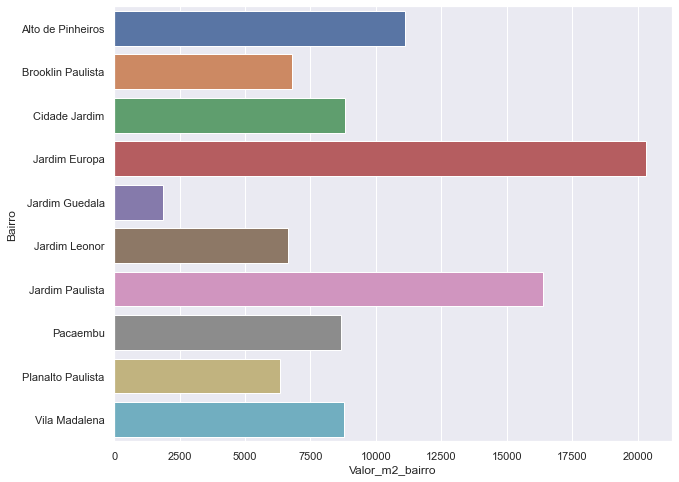

In [30]:
plt.figure(figsize = (10,8))
sns.set()
ax = sns.barplot(x = "Valor_m2_bairro", y = "Bairro", data = dados_de_anuncios_filtrados_por_bairro.query("Bairro in @top_10_bairros"))

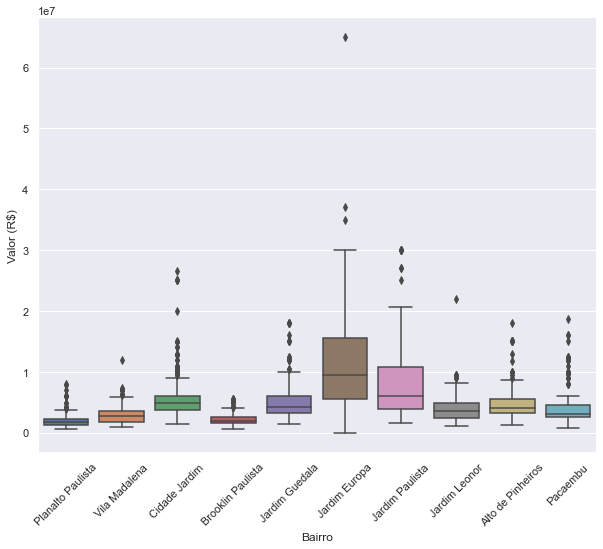

In [31]:
plt.figure(figsize = (10,8))
ax = sns.boxplot(x = "Bairro", y = "Valor (R$)", data = dados_de_anuncios_filtrados.query("Bairro in @top_10_bairros"))
ax.tick_params(axis = "x", rotation = 45)
plt.show()

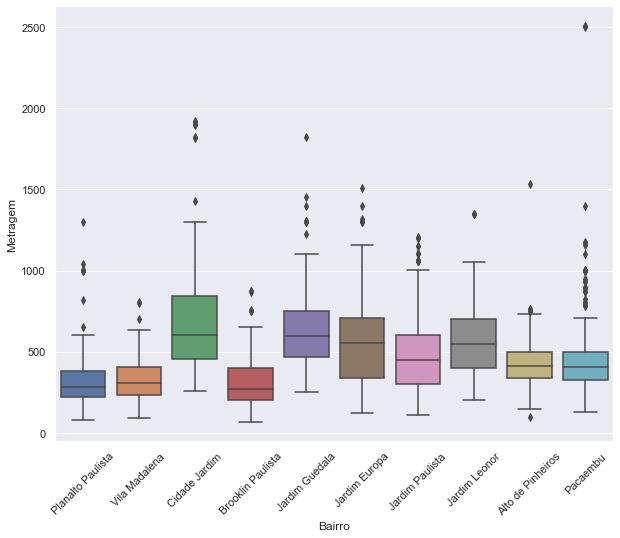

In [32]:
plt.figure(figsize = (10,8))
ax = sns.boxplot(x = "Bairro", y = "Metragem", data = dados_de_anuncios_filtrados.query("Bairro in @top_10_bairros & Metragem < 30000"))
ax.tick_params(axis = "x", rotation = 45)
plt.show()

In [33]:
dados_de_anuncios_filtrados

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor (R$),Valor_m2
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,7459.68
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,3040.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000.00,2209.68
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00,5400.00
...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,1500000.00,5617.98
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,665000.00,7000.00
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,2300000.00,3801.65
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,1050000.00,5121.95


In [34]:
ibge_url = "https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv"
pd.read_csv(ibge_url)

,,,,,,,,,,Cod_setor;Cod_Grandes Regi�es;Nome_Grande_Regiao;Cod_UF;Nome_da_UF ;Cod_meso;Nome_da_meso;Cod_micro;Nome_da_micro;Cod_RM;Nome_da_RM;Cod_municipio;Nome_do_municipio;Cod_distrito;Nome_do_distrito;Cod_subdistrito;Nome_do_subdistrito;Cod_bairro;Nome_do_bairro;Situacao_setor;Tipo_setor;V001;V002;V003;V004;V005;V006;V007;V008;V009;V010;V011;V012;
"355030801000001;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030801;""�GUA RASA"";35503080100;""�GUA RASA"";3550308000;""S�O PAULO (todos os setores)"";1;0;266;800;3",01;2,32;2091,32;8532451,78;2164,55;8673276,78;1227,41;4285771,99;1713,75;5152087,86.00
"355030801000002;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030801;""�GUA RASA"";35503080100;""�GUA RASA"";3550308000;""S�O PAULO (todos os setores)"";1;0;306;913;2",98;2,09;1650,09;3983441,31;1717,44;4030519,99;1045,78;2572133,32;1468,08;2991546,94.00
"355030801000003;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030801;""�GUA RASA"";35503080100;""�GUA RASA"";3550308000;""S�O PAULO (todos os setores)"";1;0;189;625;3",31;3,08;1280,43;5474593,06;2349,53;7553913,02;902,97;2735492,52;1786,79;3837674,74.00
"355030801000004;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030801;""�GUA RASA"";35503080100;""�GUA RASA"";3550308000;""S�O PAULO (todos os setores)"";1;0;181;572;3",16;2,26;1119,59;3572955,1;1859,13;4567289,5;869,09;2122409,02;1567,41;2735383,24.00
"355030801000005;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030801;""�GUA RASA"";35503080100;""�GUA RASA"";3550308000;""S�O PAULO (todos os setores)"";1;0;240;754;3",14;2,35;1416,9;2240207,58;1581,66;2240109,39;917,71;1570047,75;1356,35;1725877,85.00
...,...,...,...,...,...,...,...,...,...,...
"355030896000243;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030896;""LAJEADO"";35503089600;""LAJEADO"";3550308000;""S�O PAULO (todos os setores)"";1;1;96;336;3",5;2,61;772,09;168751,1;814,52;143188,21;467,46;191332,48;699,95;123399,8.00
"355030896000244;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030896;""LAJEADO"";35503089600;""LAJEADO"";3550308000;""S�O PAULO (todos os setores)"";1;1;54;209;3",87;2,49;692,5;239941,27;812,93;182516,2;439,33;194034,99;702,1;124952,38.00
"355030896000245;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030896;""LAJEADO"";35503089600;""LAJEADO"";3550308000;""S�O PAULO (todos os setores)"";1;1;87;339;3",9;2,54;630,06;329705,22;843,31;260395,9;347,6;228162,66;767,5;181129,99.00
"355030896000246;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030896;""LAJEADO"";35503089600;""LAJEADO"";3550308000;""S�O PAULO (todos os setores)"";1;0;38;163;4",29;4,21;597,37;349101;908;244391,67;397,76;436942,16;854,2;550319,43,NaN,NaN


# Desafios

- Tentar vinculador os dados do IBGE com os dados de imóveis.

- Tratar os outliers e comparar com os resultados.

- Agrupar por mais de uma categoria e realizar as análises

- Organize o colab para deixar com cara de projeto.